In [1]:

import os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from assn_2.utils import Neo4jConnection


USERNAME = os.getenv("NEO4J_USERNAME", "neo4j")
PASSWORD = os.getenv("NEO4J_PASSWORD", "password")


conn = Neo4jConnection(
    uri="bolt://localhost:11005", 
    user=USERNAME,              
    pwd=PASSWORD
)

In [39]:
GET_COUNTRIES = '''
MATCH (c:Country)<-[:LIVES_IN]-(p:Customer)
MERGE (c)<-[:LIVES_IN]-(p)
RETURN p.id, c.name, c.region, c.access_to_electricity, 
c.literacy_rate, c.gdp_per_capita, c.population, c.population_density
'''

customer_contries = conn.query(GET_COUNTRIES)

In [40]:
df = pd.DataFrame([r.values() for r in customer_contries], columns=customer_contries[0].keys())
RENAME_COLUMNS = {
    "p.id": "customer_id",
    "c.name": "country", 
    "c.region": "region",
    "c.access_to_electricity": "access_to_electricity",
    "c.literacy_rate": "literacy_rate",
    "c.gdp_per_capita": "gdp_per_capita",
    "c.population": "population",
    "c.population_density": "population_density"
}

df.rename(columns=RENAME_COLUMNS, inplace=True)
df.head()

,customer_id,country,region,access_to_electricity,literacy_rate,gdp_per_capita,population,population_density
0,218,afghanistan,Asia,30.7186908721924,..,263.733601866274,26433058,40.5272035938243
1,441,algeria,Africa,98.869010925293,72.648681640625,3478.71000237566,33641007,14.1245505386818
2,176,algeria,Africa,98.869010925293,72.648681640625,3478.71000237566,33641007,14.1245505386818
3,69,algeria,Africa,98.869010925293,72.648681640625,3478.71000237566,33641007,14.1245505386818
4,320,american samoa,Oceania,..,..,8340.52343974691,59109,295.545


In [41]:
len(customer_contries)

562

In [47]:
GET_RENTALS = '''
MATCH (f:Film)-[:LENT]->(r:Rental)
MERGE (f)-[:LENT]->(r)
RETURN r.customer_id, r.film_id, r.rental_date, r.return_date, 
f.rental_duration, f.rental_rate, f.length, 
f.replacement_cost, f.rating, f.category_name
'''

rentals = conn.query(GET_RENTALS)

In [48]:
dt = pd.DataFrame([r.values() for r in rentals], columns=rentals[0].keys())
RENAME_COLUMNS = {
    "r.customer_id": "customer_id",
    "r.film_id": "film_id",
    "r.rental_date": "rental_date",
    "r.return_date": "return_date",
    "r.return_date": "return_date",
    "f.rental_duration": "rental_duration",
    "f.rental_rate": "rental_rate",
    "f.replacement_cost": "replacement_cost",
    "f.rating": "rating",
    "f.length": "length",
    "f.category_name": "category_name"
}

dt.rename(columns=RENAME_COLUMNS, inplace=True)
dt.head()

,customer_id,film_id,rental_date,return_date,rental_duration,rental_rate,length,replacement_cost,rating,category_name
0,323,793,2005-08-21 04:53:08,2005-08-27 04:12:08,6,2.99,139,14.99,R,Action
1,43,793,2005-08-23 18:51:41,2005-08-28 18:42:41,6,2.99,139,14.99,R,Action
2,534,793,2005-08-02 10:54:30,2005-08-11 15:55:30,6,2.99,139,14.99,R,Action
3,21,793,2005-07-10 13:27:40,2005-07-17 08:24:40,6,2.99,139,14.99,R,Action
4,473,793,2005-07-12 00:44:08,2005-07-14 20:39:08,6,2.99,139,14.99,R,Action


In [44]:
len(dt)

16044

In [45]:
dx = dt.merge(df, on="customer_id", how="left")
dx.head()

,customer_id,film_id,rental_date,return_date,release_year,rental_duration,rental_rate,length,replacement_cost,rating,category_name,country,region,access_to_electricity,literacy_rate,gdp_per_capita,population,population_density
0,323,793,2005-08-21 04:53:08,2005-08-27 04:12:08,2006,6,2.99,139,14.99,R,Action,mexico,Americas,99.1141586303711,91.7345199584961,9068.29421839425,107560155,55.3307209547571
1,43,793,2005-08-23 18:51:41,2005-08-28 18:42:41,2006,6,2.99,139,14.99,R,Action,french polynesia,Oceania,100,..,..,261007,75.1964851627773
2,534,793,2005-08-02 10:54:30,2005-08-11 15:55:30,2006,6,2.99,139,14.99,R,Action,india,Asia,67.9000015258789,62.7544708251953,806.753280628799,1165486291,391.998591075579
3,21,793,2005-07-10 13:27:40,2005-07-17 08:24:40,2006,6,2.99,139,14.99,R,Action,bangladesh,Asia,50.5251007080078,..,509.640189887604,140921154,1082.59317815165
4,473,793,2005-07-12 00:44:08,2005-07-14 20:39:08,2006,6,2.99,139,14.99,R,Action,indonesia,Asia,90.620002746582,91.9822692871094,1589.80148866142,229318262,122.13898341375


In [32]:
len(dx)

16044

In [8]:
RENAME_COLUMNS = {
    "p.id": "id",
    "c.name": "name", 
    "c.region": "region",
    "c.access_to_electricity": "access_to_electricity",
    "c.literacy_rate": "literacy_rate",
    "c.gdp_per_capita": "gdp_per_capita",
    "c.population": "population",
    "c.population_density": "population_density"
}

df.rename(columns=RENAME_COLUMNS, inplace=True)

In [83]:
NUM_COLUMNS = [
    "rental_duration", 
    "rental_rate",
    "length", 
    "replacement_cost", 
    "access_to_electricity", 
    "literacy_rate", 
    "gdp_per_capita",
    "population",
    "population_density"
]

dx[NUM_COLUMNS] = dx[NUM_COLUMNS].apply(pd.to_numeric, errors="coerce")

In [84]:
dx[NUM_COLUMNS].describe(include="all")

,rental_duration,rental_rate,length,replacement_cost,access_to_electricity,literacy_rate,gdp_per_capita,population,population_density
count,16044.00000,16044.000000,16044.000000,16044.000000,14939.000000,5303.000000,14874.000000,1.499000e+04,14936.000000
mean,4.93549,2.942630,114.971080,20.215443,88.431040,79.394878,12718.300515,3.244721e+08,170.886226
std,1.40169,1.649678,40.102347,6.081771,19.918689,14.420049,16501.491428,4.624559e+08,329.234030
min,3.00000,0.990000,46.000000,9.990000,3.653227,41.891151,194.687433,9.827000e+03,0.138321
25%,4.00000,0.990000,81.000000,14.990000,80.180000,62.754471,1589.801489,3.928988e+07,32.567400
50%,5.00000,2.990000,114.000000,20.990000,98.461052,88.699341,5886.391522,1.075602e+08,112.391139
75%,6.00000,4.990000,148.000000,25.990000,100.000000,91.734520,21743.477451,2.983799e+08,270.520772
max,7.00000,4.990000,185.000000,29.990000,100.000000,99.018463,114374.246536,1.311020e+09,6530.571429


<AxesSubplot: title={'center': 'Country vs Rental Replacement Cost'}>

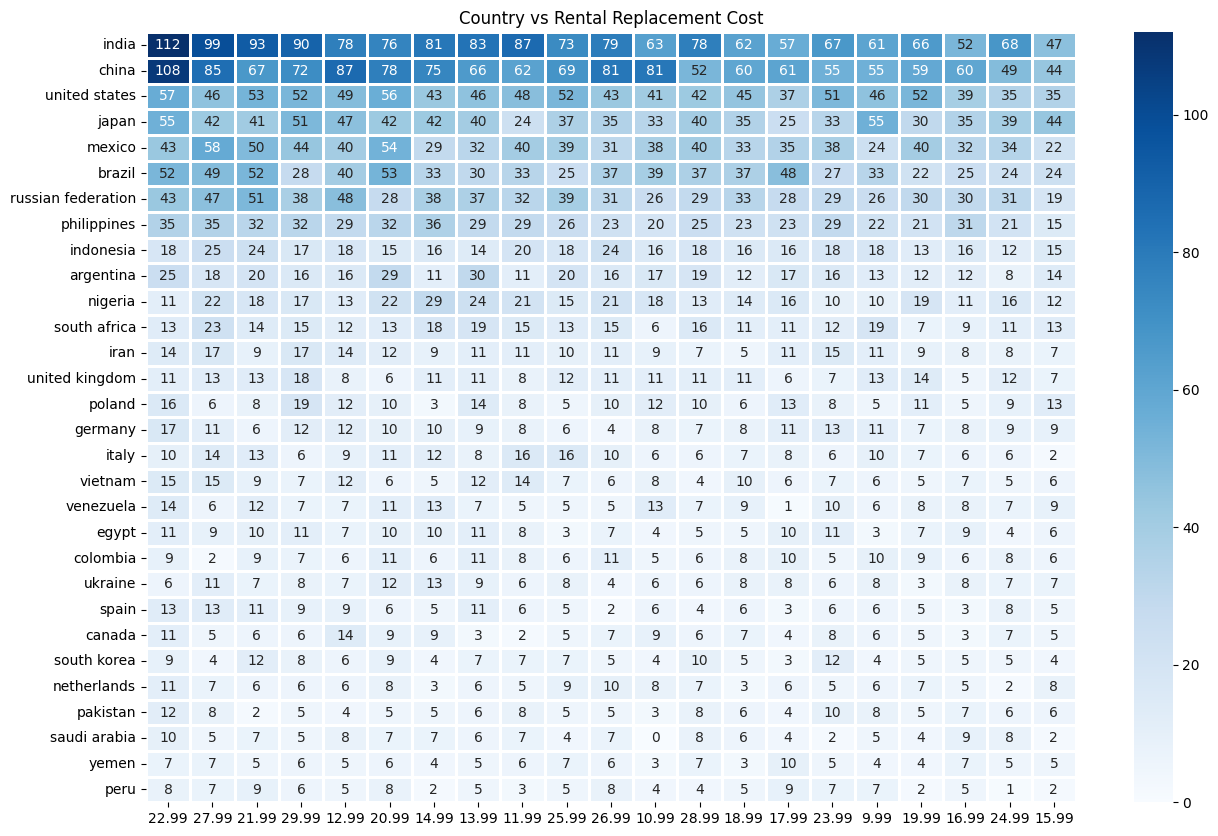

In [240]:
attributes = list(dx.replacement_cost.value_counts().index)

index = list(dx.country.value_counts().loc[dx.country.value_counts() > 100].index)
columns = {attribute: [0 for i in range(len(index))] for attribute in attributes}
dq = pd.DataFrame(data=columns, index=index)

for attribute in attributes:
    for country in index:
        dq.loc[country, attribute] = len(dx.loc[(dx["replacement_cost"] == attribute) & (dx.country == country)])

plt.subplots(figsize=(15,10))
plt.title("Country vs Rental Replacement Cost")
sns.heatmap(dq, annot=True, linewidths=0.75, fmt='.3g', cmap="Blues")

In [238]:
dx["length_quantiles"] = pd.qcut(dx.length, q=[0, .2, .4, .6, .8, 1])
dx["length_quantiles"].value_counts()

(74.0, 102.0]     3322
(128.0, 156.0]    3267
(45.999, 74.0]    3263
(156.0, 185.0]    3139
(102.0, 128.0]    3053
Name: length_quantiles, dtype: int64

In [232]:
dx.length.value_counts()

85     305
112    243
84     216
178    209
92     196
      ... 
72      42
55      42
94      42
66      22
96      20
Name: length, Length: 140, dtype: int64

In [123]:
ECONOMY_COLUMNS = ["country", "region", "access_to_electricity", "literacy_rate", "gdp_per_capita", "population", "population_density"]
dc = dx[ECONOMY_COLUMNS].drop_duplicates()
dc.head()

,country,region,access_to_electricity,literacy_rate,gdp_per_capita,population,population_density
0,mexico,Americas,99.114159,91.734520,9068.294218,1.075602e+08,55.330721
1,french polynesia,Oceania,100.000000,NaN,NaN,2.610070e+05,75.196485
2,india,Asia,67.900002,62.754471,806.753281,1.165486e+09,391.998591
3,bangladesh,Asia,50.525101,NaN,509.640190,1.409212e+08,1082.593178
4,indonesia,Asia,90.620003,91.982269,1589.801489,2.293183e+08,122.138983


In [141]:
dx_out = pd.DataFrame(dx.country.value_counts())
dx_out["rentals"] = dx_out.values
dx_out["country"] = dx_out.index
dx_out = pd.DataFrame(dx_out)
dx_out.head()

,country,rentals
india,india,1572
china,china,1426
united states,united states,968
japan,japan,825
mexico,mexico,796


In [148]:
dc = dc.merge(dx_out, on="country", how="left")

In [179]:
dc[["country", "rentals"]].loc[dc.rentals > 100].set_index("country")

,rentals
country,
mexico,796.0
india,1572.0
indonesia,367.0
south africa,285.0
brazil,748.0
russian federation,713.0
japan,825.0
argentina,352.0
poland,203.0


<AxesSubplot: ylabel='rentals'>

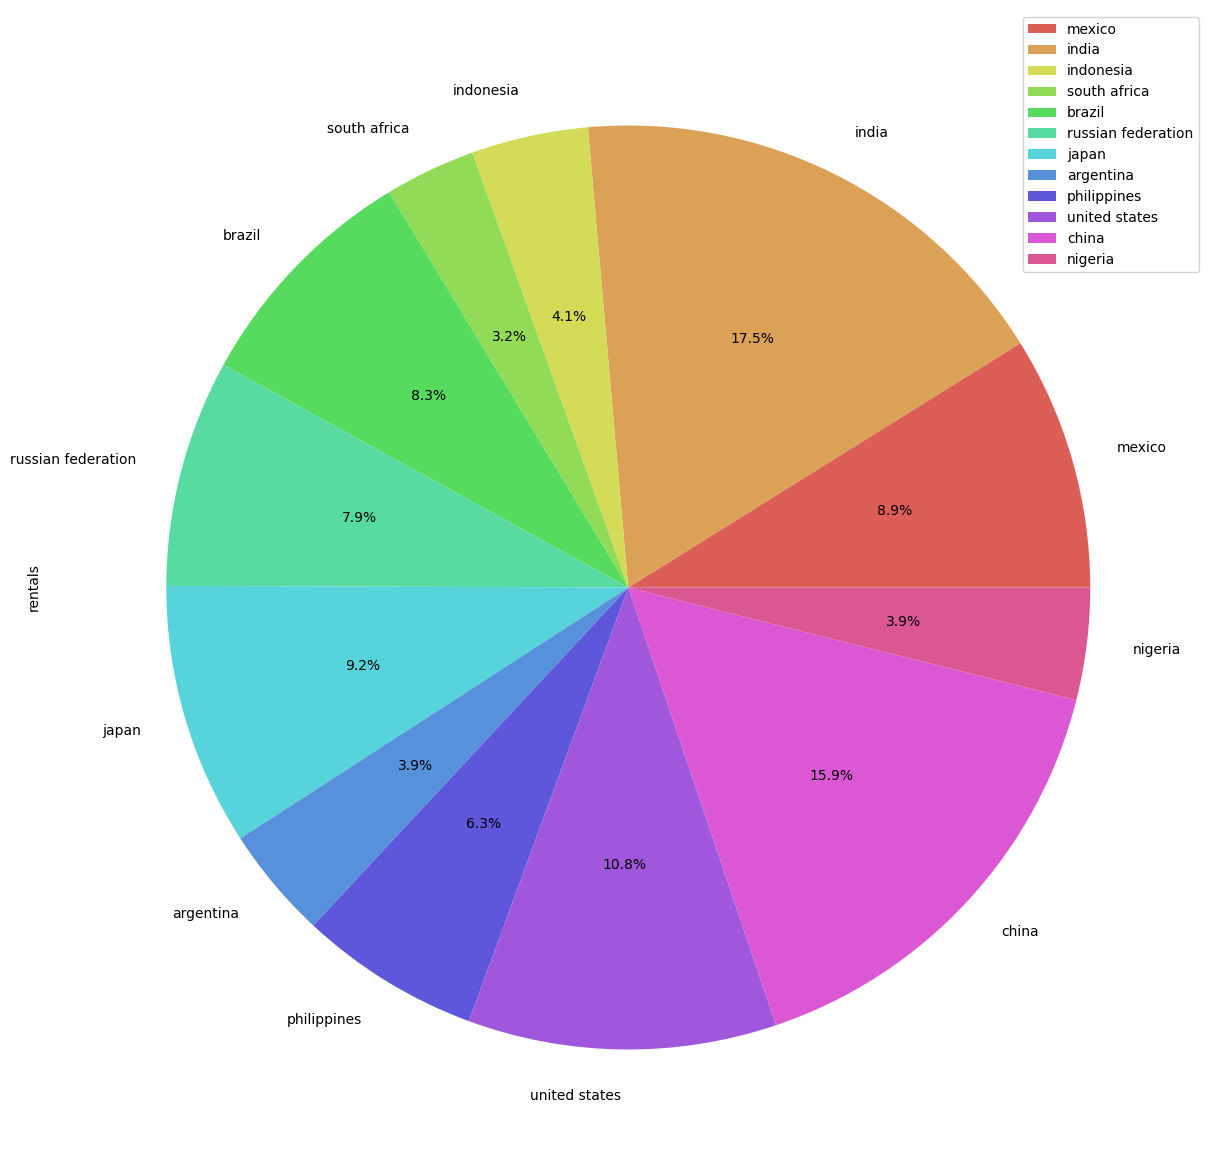

In [219]:
dc[["country", "rentals"]].loc[dc.rentals > 250].set_index("country").plot.pie(
    y="rentals", 
    figsize=(15,15), 
    autopct='%1.1f%%', 
    colors=sns.color_palette("hls", 12)
)

In [152]:
dc[["region", "rentals"]].groupby("region").sum().merge(dc.region.value_counts(), left_index=True, right_index=True)

,rentals,region
Africa,1522.0,18
Americas,3881.0,15
Asia,6557.0,29
Europe,2001.0,23
Oceania,173.0,6


<AxesSubplot: ylabel='rentals'>

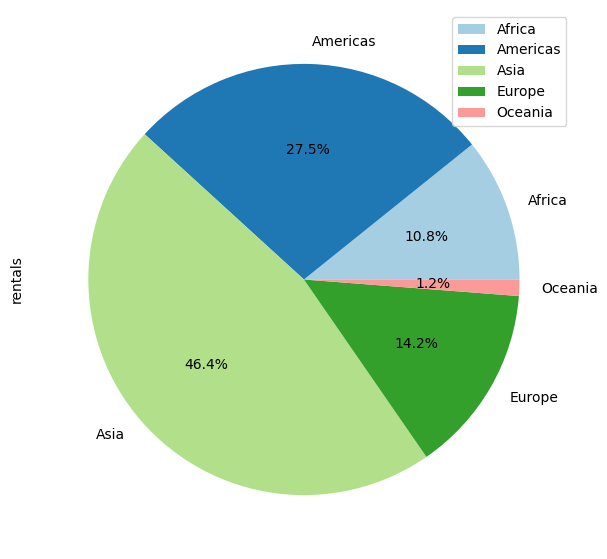

In [223]:
dc[["region", "rentals"]].groupby("region").sum().plot.pie(
    y="rentals", 
    figsize=(7,7), 
    autopct='%1.1f%%',
    colors=sns.color_palette("Paired")    
)

In [ ]:
dc[["region", "rentals"]].groupby("region").sum().plot.pie(y="rentals", figsize=(7,7), autopct='%1.1f%%')

<AxesSubplot: ylabel='region'>

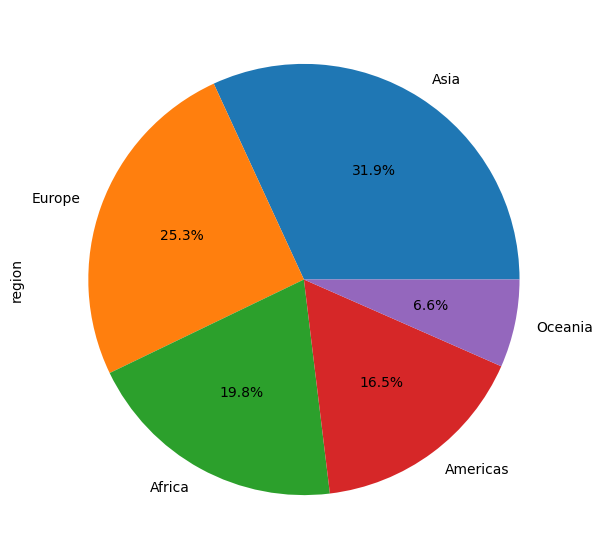

In [155]:
dc.region.value_counts().plot.pie(y="countries", figsize=(7,7), autopct='%1.1f%%')

<AxesSubplot: ylabel='access_to_electricity'>

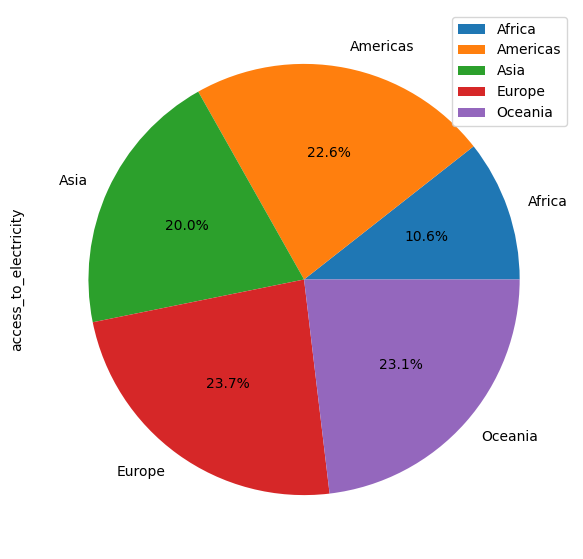

In [162]:
dc[["region", "access_to_electricity"]].groupby("region").mean().plot.pie(
    y="access_to_electricity", 
    figsize=(7,7), 
    autopct='%1.1f%%'
)

<AxesSubplot: ylabel='population'>

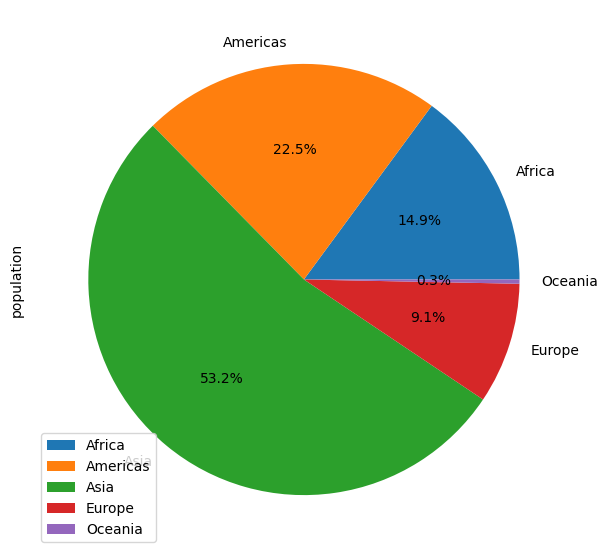

In [227]:
dc[["region", "population"]].groupby("region").mean().plot.pie(y="population", figsize=(7,7), autopct='%1.1f%%')

In [166]:
dc["rentals"].corr(dc["population_density"])

-0.03145923778151723

In [ ]:
dc["rentals"].corr(dc["population_density"])

/tmp/ipykernel_745829/4188386920.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dc.corr(), annot=True, linewidths=0.75, fmt='.3g')


<AxesSubplot: title={'center': 'Correlation between all Country Attributes'}>

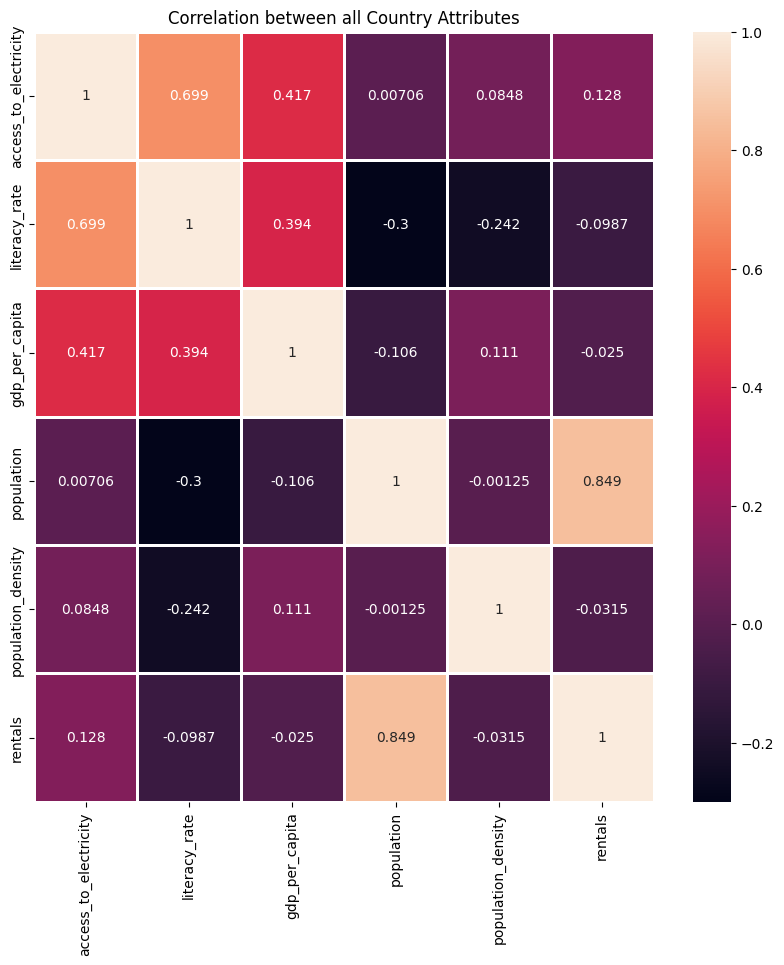

In [169]:
plt.subplots(figsize=(10,10))
plt.title("Correlation between all Country Attributes")
sns.heatmap(dc.corr(), annot=True, linewidths=0.75, fmt='.3g')

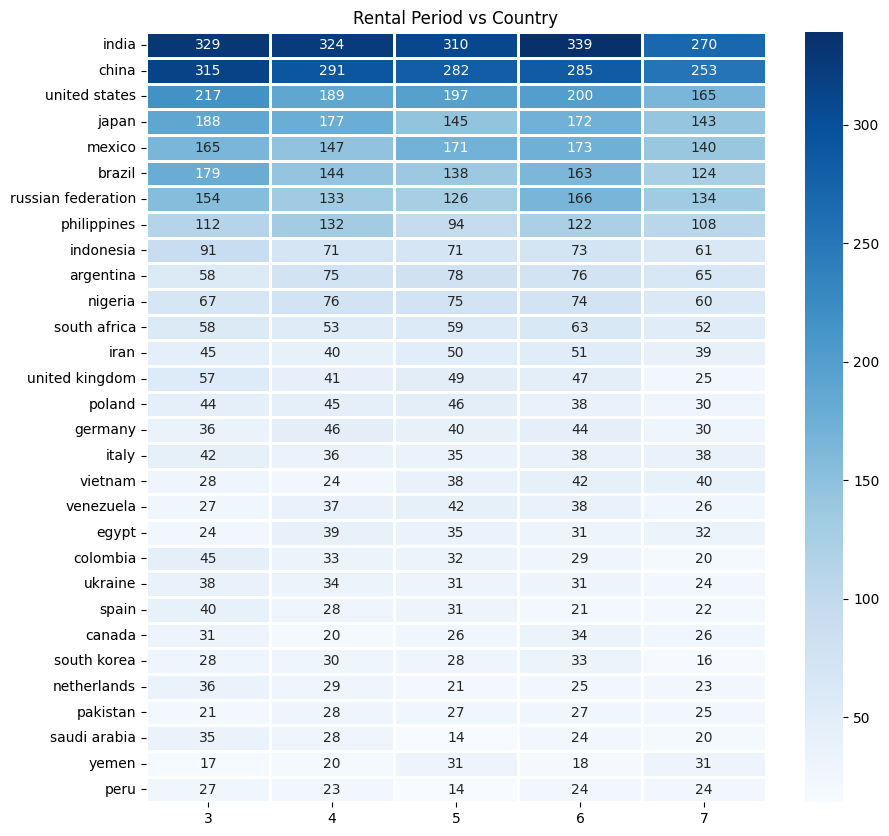

In [224]:
def get_country_heatmap(df, attributes, comparison_column, title):

    index = list(df.country.value_counts().loc[df.country.value_counts() > 100].index)
    columns = {attribute: [0 for i in range(len(index))] for attribute in attributes}
    dq = pd.DataFrame(data=columns, index=index)

    for attribute in attributes:
        for country in index:
            dq.loc[country, attribute] = len(df.loc[(df[comparison_column] == attribute) & (df.country == country)])

    plt.subplots(figsize=(10,10))
    plt.title(title)
    sns.heatmap(dq, annot=True, linewidths=0.75, fmt='.3g', cmap="Blues")

get_country_heatmap(dx, [3, 4, 5, 6, 7], "rental_duration", "Rental Period vs Country")

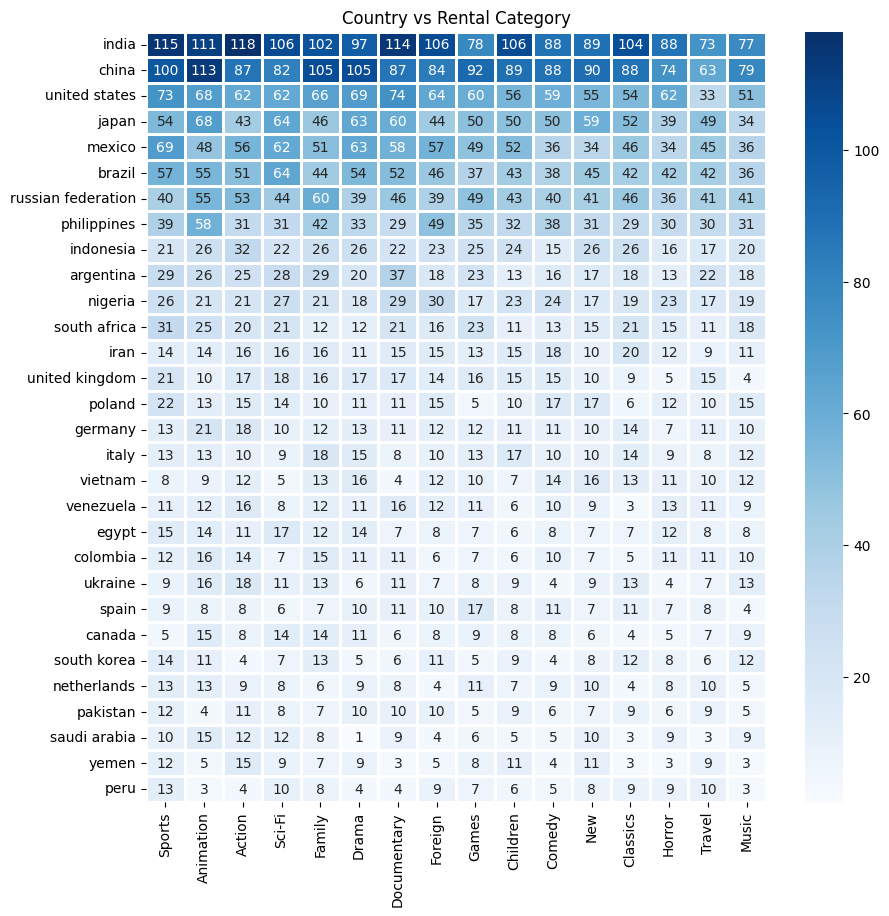

In [226]:
get_country_heatmap(dx, list(dx.category_name.value_counts().index), "category_name", "Country vs Rental Category")

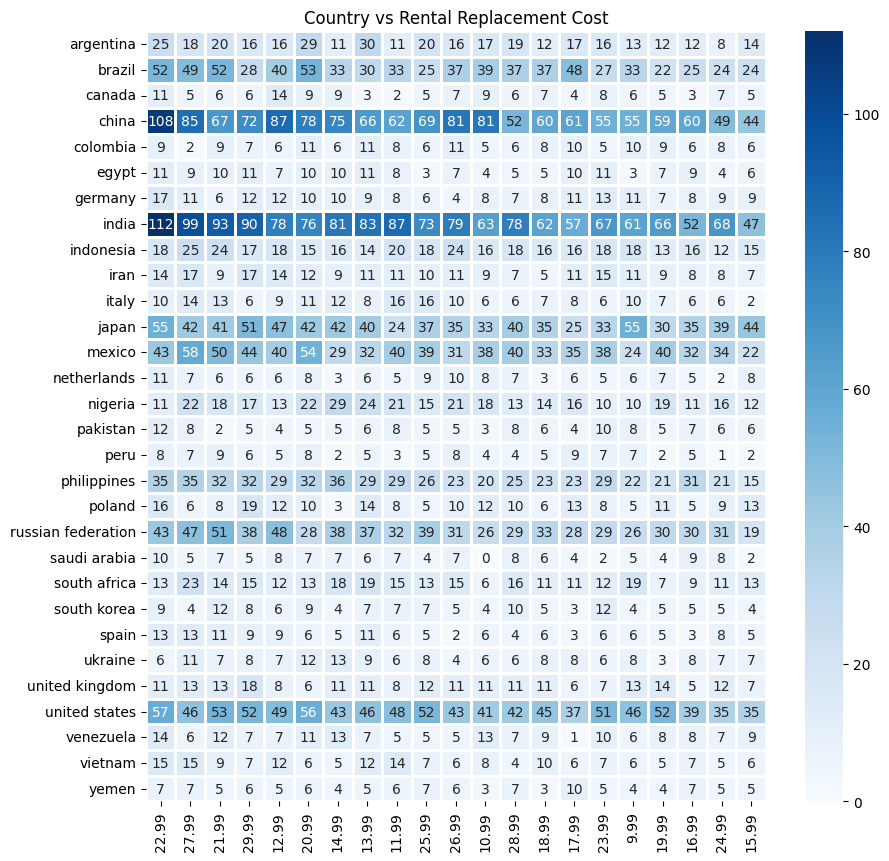

In [196]:
get_country_heatmap(dx, list(dx.replacement_cost.value_counts().index), "replacement_cost", "Country vs Rental Replacement Cost")

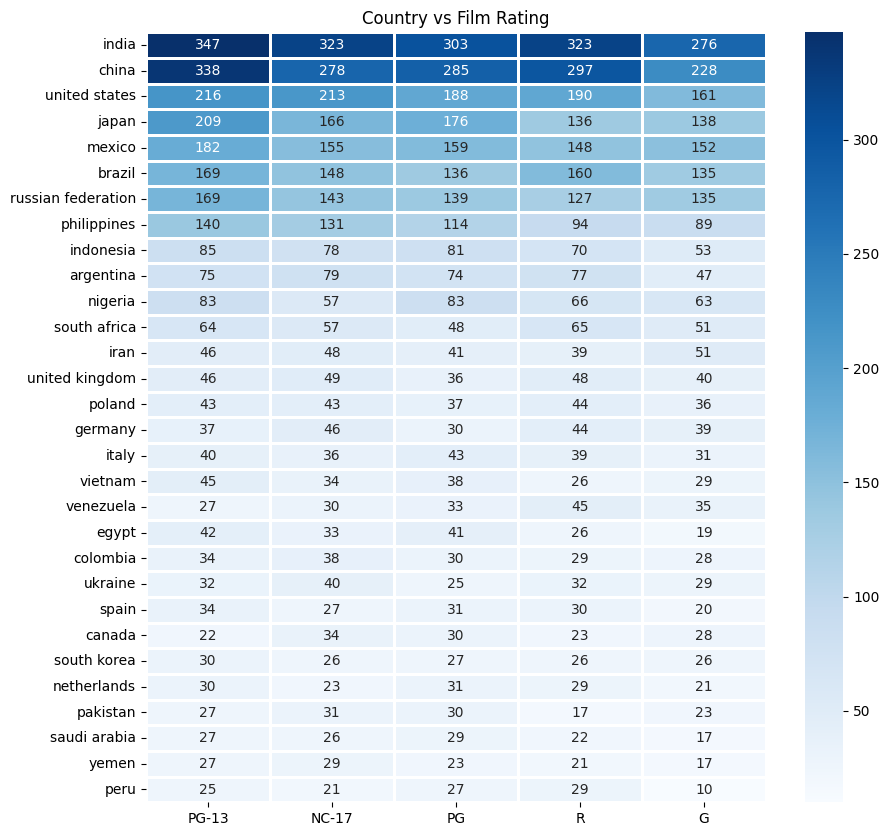

In [160]:
get_country_heatmap(dx, list(dx.rating.value_counts().index), "rating", "Country vs Film Rating")

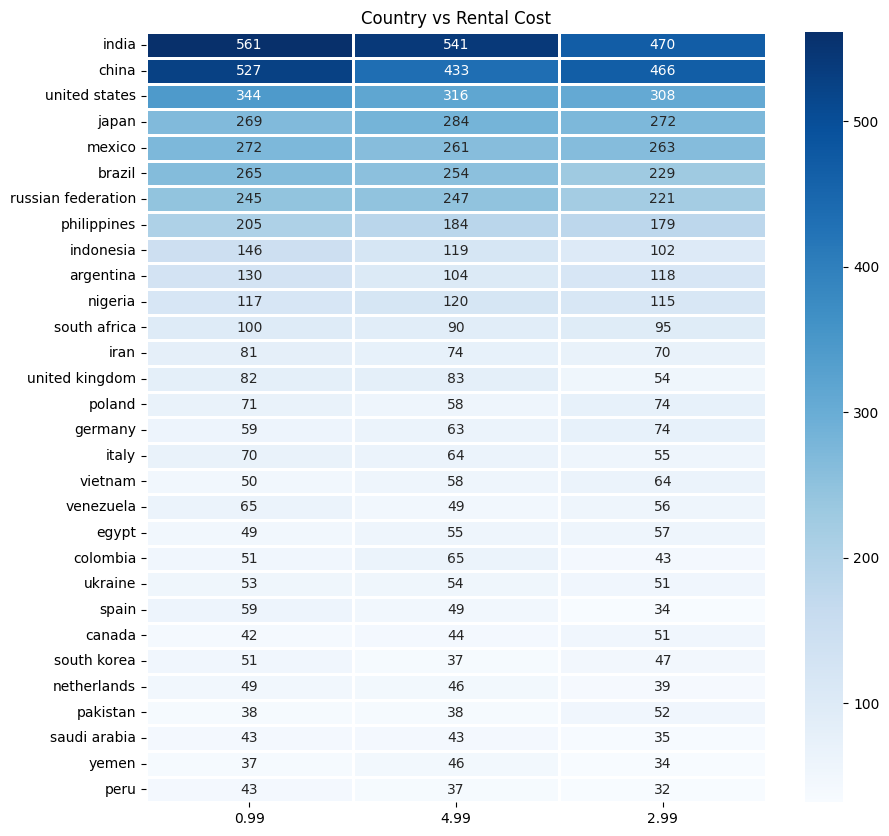

In [241]:
get_country_heatmap(dx, list(dx.rental_rate.value_counts().index), "rental_rate", "Country vs Rental Cost")

In [200]:
dx.head()

,customer_id,film_id,rental_date,return_date,release_year,rental_duration,rental_rate,length,replacement_cost,rating,category_name,country,region,access_to_electricity,literacy_rate,gdp_per_capita,population,population_density
0,323,793,2005-08-21 04:53:08,2005-08-27 04:12:08,2006,6,2.99,139,14.99,R,Action,mexico,Americas,99.114159,91.734520,9068.294218,1.075602e+08,55.330721
1,43,793,2005-08-23 18:51:41,2005-08-28 18:42:41,2006,6,2.99,139,14.99,R,Action,french polynesia,Oceania,100.000000,NaN,NaN,2.610070e+05,75.196485
2,534,793,2005-08-02 10:54:30,2005-08-11 15:55:30,2006,6,2.99,139,14.99,R,Action,india,Asia,67.900002,62.754471,806.753281,1.165486e+09,391.998591
3,21,793,2005-07-10 13:27:40,2005-07-17 08:24:40,2006,6,2.99,139,14.99,R,Action,bangladesh,Asia,50.525101,NaN,509.640190,1.409212e+08,1082.593178
4,473,793,2005-07-12 00:44:08,2005-07-14 20:39:08,2006,6,2.99,139,14.99,R,Action,indonesia,Asia,90.620003,91.982269,1589.801489,2.293183e+08,122.138983


In [211]:
dx["rental_date"] = pd.to_datetime(dx.rental_date, format="%Y-%m-%d %H:%M:%S", errors="coerce")
dx["return_date"] = pd.to_datetime(dx.return_date, format="%Y-%m-%d %H:%M:%S", errors="coerce")

dx.rental_date.dt.year.value_counts()

2005    15862
2006      182
Name: rental_date, dtype: int64

In [212]:
dx.return_date.dt.year.value_counts()

2005.0    15861
Name: return_date, dtype: int64

In [213]:
dx.rental_date.dt.month.value_counts()

7    6709
8    5686
6    2311
5    1156
2     182
Name: rental_date, dtype: int64

In [215]:
dx.return_date.dt.month.value_counts()

8.0    8145
7.0    4188
6.0    3071
5.0     395
9.0      62
Name: return_date, dtype: int64

In [242]:
dx.rental_date.dt.day_of_week.value_counts()

1    2463
6    2320
5    2311
4    2272
0    2247
2    2231
3    2200
Name: rental_date, dtype: int64

In [243]:
dx.return_date.dt.day_of_week.value_counts()

6.0    2370
3.0    2298
0.0    2283
4.0    2277
5.0    2245
2.0    2222
1.0    2166
Name: return_date, dtype: int64